# Classifiers

In this notebook we will compare different classifiers to discover their impact on imbalanced data. We found online that some models perform better (neural networks) on imblanced datasets than other models. We hope to achieve similar results here.

In [1]:
## Imports ##

# numpy
import numpy as np

# matplotlib
import matplotlib as mlp
import matplotlib.pyplot as plt

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# skactiveml
from skactiveml.classifier import SklearnClassifier, ParzenWindowClassifier, MixtureModelClassifier
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import MISSING_LABEL

# plot function
from plot_accuracy import plot_accuracy

# balanced accuracy
from balanced_accuracy import balanced_accuracy

# set warnings
import warnings
mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

Most lineair classifiers do NOT work because the wrapper function SklearnClassifier calls a method predict_proba, so we could only use the basic classifiers shown above in the imports. MLPClassifier is a neural network. 

These classifiers will already provide a strong start.

In [2]:
def get_accuracy_linear_classifier(classifier, weights=None, cycles=30, n_samples=400, **kwargs):
    data = []
    for rand in range(100):
        qs = UncertaintySampling(random_state=rand, **kwargs)
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, weights=weights, random_state=rand)
        Xf, Xt, yf, yt = train_test_split(X, y, random_state=rand)
        y = np.full(shape=yf.shape, fill_value=MISSING_LABEL)
        out = []
        clf = SklearnClassifier(classifier, classes=np.unique(yf))

        clf.fit(Xf, y)
        for _ in range(cycles):
            i = qs.query(Xf, y, clf)
            y[i] = yf[i]
            clf.fit(Xf,y)
            predicted_y = clf.predict(Xt)
            out.append(balanced_accuracy(yt, predicted_y))
        data.append(out)

    return np.mean(np.array(data), axis=0)

def get_accuracy_parzenwindow_classifier(weights=None, cycles=30, n_samples=400, **kwargs):
    data = []
    for rand in range(100):
        qs = UncertaintySampling(random_state=rand, **kwargs)
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, weights=weights, random_state=rand)
        Xf, Xt, yf, yt = train_test_split(X, y, random_state=rand)
        y = np.full(shape=yf.shape, fill_value=MISSING_LABEL)
        out = []
        clf = ParzenWindowClassifier(classes=np.unique(yf))

        clf.fit(Xf, y)
        for _ in range(cycles):
            i = qs.query(Xf, y, clf)
            y[i] = yf[i]
            clf.fit(Xf,y)
            predicted_y = clf.predict(Xt)
            out.append(balanced_accuracy(yt, predicted_y))
        data.append(out)

    return np.mean(np.array(data), axis=0)

def get_accuracy_mixture_model(weights=None, cycles=30, n_samples=400, **kwargs):
    data = []
    for rand in range(100):
        qs = UncertaintySampling(random_state=rand, **kwargs)
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, weights=weights, random_state=rand)
        Xf, Xt, yf, yt = train_test_split(X, y, random_state=rand)
        y = np.full(shape=yf.shape, fill_value=MISSING_LABEL)
        out = []
        clf = MixtureModelClassifier(classes=np.unique(yf))

        clf.fit(Xf, y)
        for _ in range(cycles):
            i = qs.query(Xf, y, clf)
            y[i] = yf[i]
            clf.fit(Xf,y)
            predicted_y = clf.predict(Xt)
            out.append(balanced_accuracy(yt, predicted_y))
        data.append(out)

    return np.mean(np.array(data), axis=0)

In [3]:
acc_logistic_regression = get_accuracy_linear_classifier(LogisticRegression(), weights=[0.8, 0.2])

In [4]:
acc_sgd_classifier = get_accuracy_linear_classifier(SGDClassifier(loss='modified_huber'), weights=[0.8, 0.2])

In [5]:
acc_mlp_classifier = get_accuracy_linear_classifier(MLPClassifier(), weights=[0.8, 0.2])

In [6]:
acc_randomforest_classifier = get_accuracy_linear_classifier(RandomForestClassifier(), weights=[0.8, 0.2])

In [7]:
acc_parzen_window = get_accuracy_parzenwindow_classifier(weights=[0.8, 0.2])

In [8]:
acc_mixture_model = get_accuracy_mixture_model(weights=[0.8, 0.2])

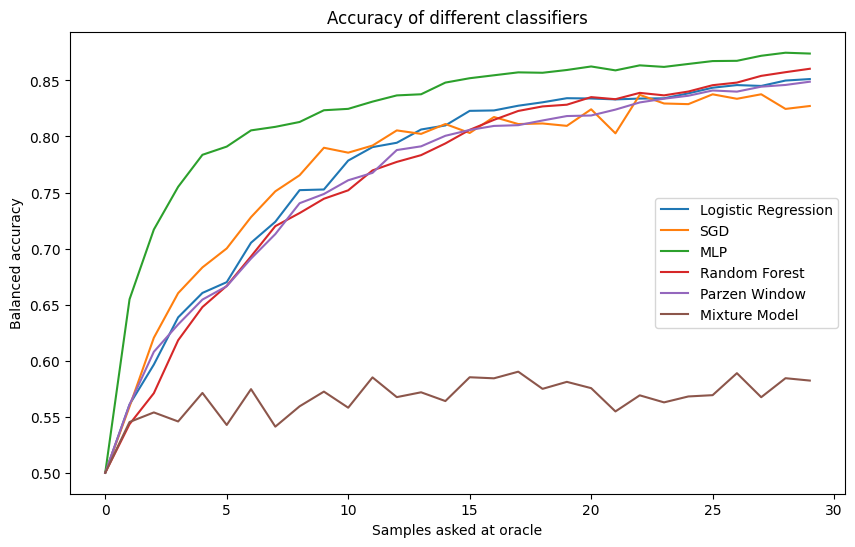

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

plot_accuracy('Accuracy of different classifiers', [[acc_logistic_regression, "Logistic Regression"],
                                                    [acc_sgd_classifier, "SGD"],
                                                    [acc_mlp_classifier, "MLP"],
                                                    [acc_randomforest_classifier, "Random Forest"],
                                                    [acc_parzen_window, "Parzen Window"],
                                                    [acc_mixture_model, "Mixture Model"]
                                                   ], axs)

fig.show()

We can see that not much changes and the linear classifiers all perform well on the imbalanced data. Except for the Mixture model classifier which performs suprisingly badly.

We can also see that, as expected, the neural network performs very well on the data. This lines up with the research we did online.